In [1]:
import pandas as pd
import json
from datetime import datetime
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

### Load the data

In [11]:
#number inhabitants italy
N = 60.48e6 

with open("./COVID-19/dati-json/dpc-covid19-ita-andamento-nazionale.json") as f:
        dataset = json.load(f)
        
#days = range(len(dataset))
num_casi = []

days = []

for item in dataset:
    num_casi.append(item['totale_casi'])
    
    #convert to datetime
    days.append(datetime.strptime(item['data'], '%Y-%m-%d %H:%M:%S'))

In [13]:
# Initial number of infected and recovered individuals (in date 2-24-2020)

I0 = dataset[0]['totale_casi']
R0 = dataset[0]['dimessi_guariti']
        
# Number of people susceptible to infection initially.
S0 = N - I0 - R0

# Initial conditions vector
y0 = S0, I0, R0

### Compare real data and model

In [20]:
t = np.linspace(0, len(dataset), len(dataset))

# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta = 0.28
gamma = 1./15.

print("R0:", beta/gamma)

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

R0: 4.2


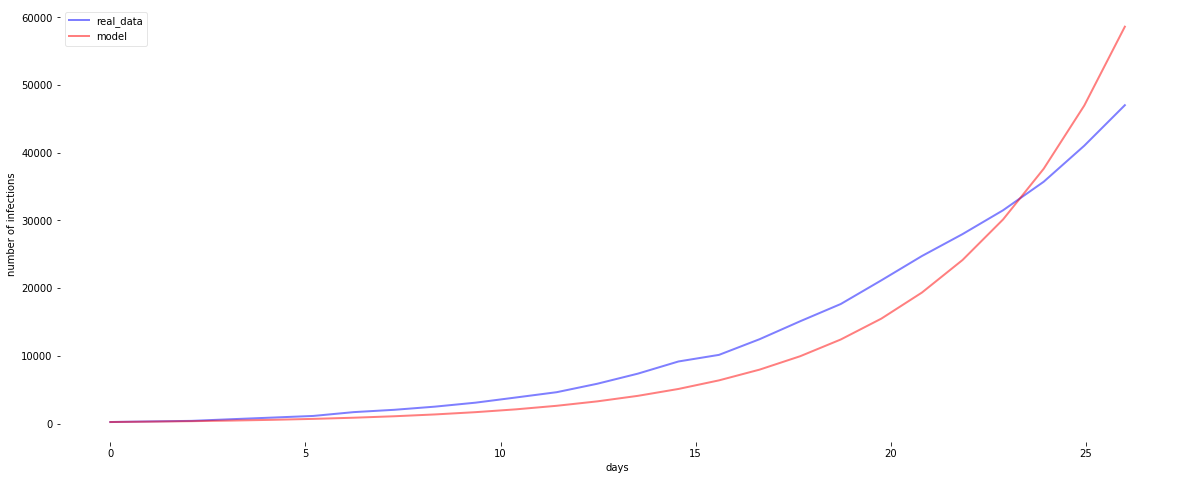

In [21]:
fig = plt.figure(facecolor='w', figsize=(20,8))

ax = fig.add_subplot(111, axisbelow=True)
#ax.plot(days, num_casi, 'b', alpha=0.5, lw=2, label='real_data')
ax.plot(t, num_casi, 'b', alpha=0.5, lw=2, label='real_data')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='model')
ax.set_xlabel('days')
ax.set_ylabel('number of infections')

#ax.yaxis.set_tick_params(length=0)
#ax.xaxis.set_tick_params(length=0)

ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

### Predict future

In [22]:
num_days = 150

t = np.linspace(0, num_days, num_days)

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

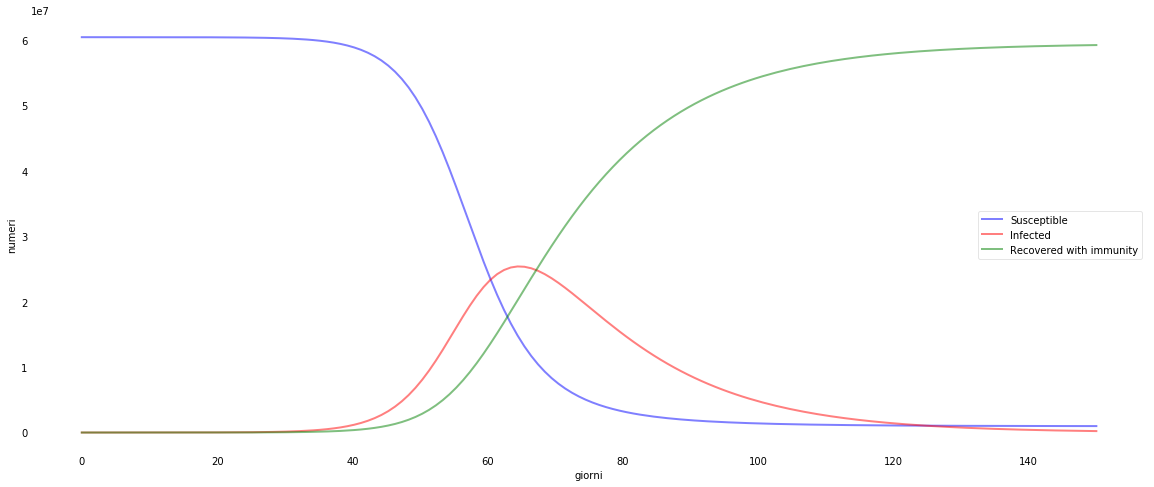

In [23]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize=(20,8))

ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('giorni')
ax.set_ylabel('numeri')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [24]:
dataset

[{'data': '2020-02-24 18:00:00',
  'stato': 'ITA',
  'ricoverati_con_sintomi': 101,
  'terapia_intensiva': 26,
  'totale_ospedalizzati': 127,
  'isolamento_domiciliare': 94,
  'totale_attualmente_positivi': 221,
  'nuovi_attualmente_positivi': 221,
  'dimessi_guariti': 1,
  'deceduti': 7,
  'totale_casi': 229,
  'tamponi': 4324},
 {'data': '2020-02-25 18:00:00',
  'stato': 'ITA',
  'ricoverati_con_sintomi': 114,
  'terapia_intensiva': 35,
  'totale_ospedalizzati': 150,
  'isolamento_domiciliare': 162,
  'totale_attualmente_positivi': 311,
  'nuovi_attualmente_positivi': 90,
  'dimessi_guariti': 1,
  'deceduti': 10,
  'totale_casi': 322,
  'tamponi': 8623},
 {'data': '2020-02-26 18:00:00',
  'stato': 'ITA',
  'ricoverati_con_sintomi': 128,
  'terapia_intensiva': 36,
  'totale_ospedalizzati': 164,
  'isolamento_domiciliare': 221,
  'totale_attualmente_positivi': 385,
  'nuovi_attualmente_positivi': 74,
  'dimessi_guariti': 3,
  'deceduti': 12,
  'totale_casi': 400,
  'tamponi': 9587},
 {

### Orig script

In [ ]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w', figsize=(20,8))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [ ]:
#convert to datetime
#datetime_object = datetime.strptime(test, '%Y-%m-%d %H:%M:%S')